source: https://rapidminer.com/blog/data-prep-time-consuming-tedious/, data published on Forbes
<br>
<img src="../images/data_prep_time.jpeg"
     alt="Markdown Monster icon"
     height=400
     width= 800
     style="float: left; margin-right: 0.5px;" />

## we spend ~80% of our time on prep, and we seem to enjoy this the least. Lets spend an hour talking about that!
___

# a little about me first:
* bachelors in chemistry -> 4 years of research -> 2x rejected from medschool -> quarter life crisis ->-> PhD candidate in Biomedical Informatics


# I wrote this workshop for the person I was 8,6,4, 2, and 1 year(s) ago
* a person who wants to work with clinical data, but never has
* a person who is given clinical data and but has no training in how to work with it
* a person who sees both the potential in and barriers to leveraging Electronic Health Record data (doesn't know what he doesn't know)
* a person who is learning how to work with clinical data in python, (knows he doesn't know much)
* a person who does clinical data science, and wants to look at other examples for reference (knows he wants to learn more)

# Agenda
1. Introduce a basic clinical datascience framework structure
1. Describe the dataset
1. demo a short clinical datascience workflow
    * highlight some useful questions to ask
    * provide annotated code to ask them 

# Note
* this is to serve as an example of one data cleaning workflow and is by no means comprehensive
* "Art is never finished, only abandoned" -Leonardo da Vinci

# Code Inspiration:
* prediction task & workflow inspired by: https://github.com/alistairewj/challenge2012/blob/master/prepare-data.ipynb
* my own research: https://github.com/geickelb/mimiciii-antibiotics-opensource

----------
# 1. Introduce components of a basic clinical datascience framework
----------

### Example framework:
<img src="../images/mimic_workflow_workshop3.png"
     alt="Markdown Monster icon"
     height=1000
     width= 1500
     style="float: left; margin-right: 0.5px;" />

----------
# 2. Describe our framework
----------

## Clinical Problem:
* in hospital mortality is a problem, and we want to be able to better predict it.

## Dataset
#### Source:
* https://physionet.org/content/challenge-2012/1.0.0/

#### Description:
* **MIMIC-III**:  
    * de-identified ICU dataset from Beth Israel Deaconess Medical Center
    * containing 12 years of patient care data (2001-2012)
    * data on over 61,000 ICU stays
* **Physionet 2012 challenge dataset**:
    * Subset of patients and variables from MIMIC-III dataset
    * **does not require all participants to sign up for a physionet account**
    * data on ~4,000 ICU stays
    * note: I have made some modifications to the origional challenge data to make it more easily usable


## Data Preparation
### Cohort Specification (already done for us)
* **Inclusion**
    * All patients were adults who were admitted for a wide variety of reasons to cardiac, medical, surgical, and trauma ICUs. 
* **Exclusion**
    * ICU stays of less than 48 hours
* **Outcomes**
    * Multiple outcomes are provided (see documentation)
    * Our chosen outcome: In Hospital Mortality (y/n)


### Data Extraction (already done for us)
* **Structured Variables**
    * Up to 42 variables were recorded at least once during the first 48 hours after admission to the ICU. 
    * Sparce: Not all variables are available in all cases
    * Static variables: 6 of these variables are general descriptors (collected on admission)
    * Longitudinal variables: 36 longitudinal time series variables (multiple observations may be available)
    * time stamp: time after ICU admission (HH:MM) 


### Data Cleaning (TO DO; see below)
### Preprocessing( TO DO; see below)
## Modeling (TO DO; see modeling.ipynb)
## Model Evaluation (TO DO; see modeling.ipynb)

-------
# 3. Demo
-------

# The python preamble: importing the packages and datasets

In [1]:
## importing packages
import pandas as pd # a brilliant package for data manipulation & analysis, this package introduces a "dataframe" similar to that in R.
import os # default package that is included with python, helpful for filepath stuff. 
import numpy as np # a foundational package for  arrays, matricies, and associated mathmatical operations
import matplotlib.pyplot as plt # a foundational plotting and datavisualization library, highly customizable, but a bit less user friendly
import seaborn as sns # a newer plotting library, less customizable, but has better default settings & is much easier to plug and play

In [2]:
## importing datasets
df = pd.read_csv('../data/set-b_predictors.csv') ## assumes your working directory is the base of this github repo.
y = pd.read_csv('../data/set-b_outcomes.csv') ## assumes your working directory is the base of this github repo.

### for debugging if above doesn't work
# the above code is written assuming your working directory is the base of this github repo.
# os.getcwd() #useful command to see what your current working directory (or implied) is. 
# os.chdir(path) #command to change the CWD, where path should be to the MIMIC-III_to_Model base folder. for me source ='/Users/geickelb1/Documents/GitHub/MIMIC-III_to_Model/'

remember, we can think of data preparation as a 4 stage process: **Cohort specification, Data Extraction, Data Cleaning, and Preprocessing**.

in this demo, **Cohort speficiation** and **Data Extraction** have already been performed for us so we can focus on the steps of **Data Cleaning** and **Preprocessing**.



<a id="Data_Cleaning"></a>
# Data Cleaning: optimizing data quality
* EHR data is notoriously messy 
* model quality is dependent on data quality


### common isses in data quality
* duplicate values on the same primary key (ie >1 values exist when only 1 should)
* erroneous values 
    * data entry error
    * measurement error
    * discrepent units of measurement
* missing values
    * 

1. **What does my dataset look like, and what do the columns mean?**
1. What kinds of data do i have in my dataset?
1. do certain kinds of data need to be handled differently?
1. How is my dataset formatted and how could I format it? 
1. What kinds of data do i have?
1. do certain kinds of data need to be handled differently?
1. do categorical values need to be reformatted? 
1. does my dataset have erroneous values?
1. How is data collected and are values missing? 

lets get a quick sense of what the data looks like and what the columns mean:

In [3]:
df.head(5)  #show the first 5 rows of the dataframe

,time,parameter,value,recordid
0,00:00,RecordID,144404.0,144404
1,00:00,Age,71.0,144404
2,00:00,Gender,1.0,144404
3,00:00,Height,172.7,144404
4,00:00,ICUType,4.0,144404


**column descriptions:**
* time: the amount of time that has passed since ICU admission
* parameter: the name of the parameter in question
* value: value of the parameter in question
* recordID: the foreign key tied to each unique ICU admission/stay

1. <del>What does my dataset look like, and what do the columns mean
1. How **is** the data structured & how **do we want it** structured?
    * Common structures:
        * long: **multiple rows per timepoint** with single value column (septal.length) and label (species); (preferred when cleaning):  
        * wide: **one row per timepoint** with a column for each measurement;
            * ![long_wide_data](../images/long_wide_data.png)


<details> 
  <summary> how is our data structured? (click to reveal answer)<b> </summary>
   long format 
</details>

long format is helpful because the number of columns doesn't change, and we can address each group through iteration or split-apply-combine operations

### useful tools:
convert wide to long: 
* pandas.melt() 
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

convert long to wide:
* df.pivot()
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot

#### remember, for modeling we ultimately need a wide format dataframe where each recordid has a single row. 
**my recommended approach: get the dataframe into long format -> perform all the cleaning/preprocessing -> pivot to wide format**

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>How **is** the data formatted & how **do we want it** formatted?
1. **What kinds & types of data do i have in the dataset?**
       * types: float, int, string, mixed...
       * kinds: longitudinal, static


#### lets first look at data types for every parameter:

In [4]:
## groupby[value].apply is a: split-apply-combine type operation. 
(df
     .groupby('parameter') #split each paramter into groups
         ['value'] #look at the value column for each group
             .apply(np.dtype)) #apply the np.dtype() function to each group of values

parameter
ALP            float64
ALT            float64
AST            float64
Age            float64
Albumin        float64
BUN            float64
Bilirubin      float64
Cholesterol    float64
Creatinine     float64
DiasABP        float64
FiO2           float64
GCS            float64
Gender         float64
Glucose        float64
HCO3           float64
HCT            float64
HR             float64
Height         float64
ICUType        float64
K              float64
Lactate        float64
MAP            float64
MechVent       float64
Mg             float64
NIDiasABP      float64
NIMAP          float64
NISysABP       float64
Na             float64
PaCO2          float64
PaO2           float64
Platelets      float64
RecordID       float64
RespRate       float64
SaO2           float64
SysABP         float64
Temp           float64
TroponinI      float64
TroponinT      float64
Urine          float64
WBC            float64
Weight         float64
pH             float64
Name: value, dtype: obje

we now know all of our data is numerical, so we don't have to deal with any text

#### now lets explore the kinds of data we have:

if we look back to the data extraction details, we know we have both **static** (ie taken on admission) and **longitudinal variables**.


visualization for longitudinal variables over time can look across multiple patients :

<img src="../images/async_uneven_imbalanced.png" 
     height=400
     width= 400
     alt="Example Visualization of a Snapshot (aggregated) Prediction Model" 
     title="Snapshot Variable Prediction Model" />

In [5]:
## groupby[value].apply is a: split-apply-combine type operation. 
(df
     .groupby(['parameter']) #split each parameterinto groups
         ['value'] #look at the value column in each group
             .count()) #count the number of values we see

parameter
ALP              3209
ALT              3302
AST              3301
Age              4000
Albumin          2450
BUN             13891
Bilirubin        3329
Cholesterol       356
Creatinine      13959
DiasABP        146210
FiO2            31591
GCS             62566
Gender           4000
Glucose         13154
HCO3            13612
HCT             18439
HR             228606
Height           4000
ICUType          4000
K               14667
Lactate          8461
MAP            146458
MechVent        30215
Mg              13725
NIDiasABP       99262
NIMAP           97883
NISysABP        99420
Na              13721
PaCO2           22840
PaO2            22774
Platelets       14349
RecordID         4000
RespRate        56359
SaO2             7592
SysABP         146259
Temp            84552
TroponinI         376
TroponinT        2169
Urine          137123
WBC             13092
Weight         129438
pH              23825
Name: value, dtype: int64

In [6]:
df.recordid.nunique()

4000

takeaway: we have 4000 patients, so if this count is above 4000, we know it has been measured more than once per each patient. 

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. **do certain kinds of data need to be handled differently?**


longitudinal data has numerous timepoints over our datacollection window; 
static data has one timepoint (at admission)

**answer: Yes.** longitudinal and static data is often much easier to handle when seperated.

<br>
algorithm to seperate:

#### our algorithm to seperate them:
1. filter to rows of static data (we know this was taken upon admission, so time will = 00:00)
1. filter to parameters we know are ONLY measured at 00:00 
1. copy this filtered dataframe as df_static
1. remove the filtered rows from the longtidinal dataframe 



In [7]:
# filter to rows of static data (we know this was taken upon admission, so time will = 00:00
df_static = df.loc[df['time'] == '00:00', :].copy() #filter the dataframe to only rows with time == "00:00" and asign a copy of this to the name df_static

# filter to parameters that we know correspond to static data:
static_vars = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight'] #note the recordid here is redundant.

#copy this filtered dataframe as df_static
df_static = df_static.loc[df['parameter'].isin(static_vars),:]

#making sure the df_static values are in numeric format
df_static['value'] = pd.to_numeric(df_static['value'],  errors='raise')

# remove the filtered rows from the longtidinal dataframe
idxDrop = df_static.index
df = df.loc[~df.index.isin(idxDrop), :]

<br>
now lets check that df doesn't have the static vars, and vice versa

In [8]:
df['parameter'].unique()

array(['DiasABP', 'GCS', 'HR', 'MAP', 'NIDiasABP', 'NIMAP', 'NISysABP',
       'SysABP', 'Temp', 'Urine', 'Weight', 'FiO2', 'MechVent', 'pH',
       'PaCO2', 'PaO2', 'SaO2', 'Albumin', 'ALP', 'ALT', 'AST',
       'Bilirubin', 'BUN', 'Creatinine', 'Glucose', 'HCO3', 'HCT', 'Mg',
       'Platelets', 'K', 'Na', 'WBC', 'Lactate', 'Cholesterol',
       'RespRate', 'TroponinT', 'TroponinI'], dtype=object)

In [9]:
df_static['parameter'].unique()

array(['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight'],
      dtype=object)

<br>
lets ask: 

* for all of the parameters, what is the maximum number of patients that have them?
* if this is higher than 4000 (# pt in the dataset), we should investigate


In [10]:
df.groupby('parameter')['recordid'].nunique()

parameter
ALP            1689
ALT            1735
AST            1736
Albumin        1631
BUN            3944
Bilirubin      1728
Cholesterol     343
Creatinine     3944
DiasABP        2811
FiO2           2702
GCS            3935
Glucose        3912
HCO3           3939
HCT            3940
HR             3935
K              3927
Lactate        2215
MAP            2806
MechVent       2511
Mg             3917
NIDiasABP      3518
NIMAP          3516
NISysABP       3534
Na             3937
PaCO2          3012
PaO2           3011
Platelets      3938
RespRate       1127
SaO2           1753
SysABP         2811
Temp           3935
TroponinI       181
TroponinT       942
Urine          3904
WBC            3934
Weight         2682
pH             3031
Name: recordid, dtype: int64

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. <del>do certain kinds of data need to be handled differently?
1. QC: are there any duplicate values that need to be addressed?

    

In [11]:
#complicated query, lets break it down:
(df_static.groupby(['recordid','parameter']) #groupby unique combinations of recordid and parameter (ie a composite key)
                 [['value']] #(in this grouped by set, look at the value column)
                     .count() #count the number of values per recordid-parameter composite key
                         .sort_values('value',ascending=False) #sort the counts in decending order.
)

value
recordid parameter       
149509   Weight         2
142675   Age            1
149427   Age            1
149428   ICUType        1
         Height         1
...                   ...
146059   Weight         1
         RecordID       1
         ICUType        1
         Height         1
152864   Weight         1

[24000 rows x 1 columns]

In [12]:
# a more direct answer to the question but with less information (ie cant see which value is duplicated)
df_static.groupby(['recordid', 'parameter'])[['value']].count().max() 

value    2
dtype: int64

In [13]:
# solution: pick the last value when there is a duplicate
df_static = df_static.groupby(['recordid', 'parameter'])[['value']].last()
df_static.reset_index(inplace=True)

any duplicate values in the longitudinal data will be addressed when we look at distribution, and aggregate later

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. <del>do certain kinds of data need to be handled differently?
1. <del>QC: are there any duplicate values that need to be addressed?
1. QC: what do the distributions of static variables look like? 
    * look for erroneous or nonsensical values
    * can you tell if error is due to order of magnitude, unit of measurement, or random?
    

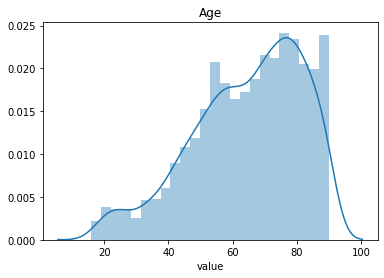

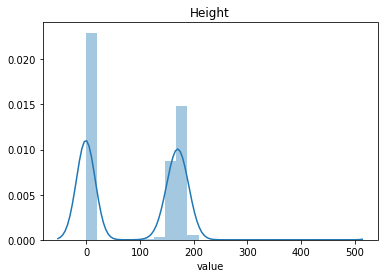

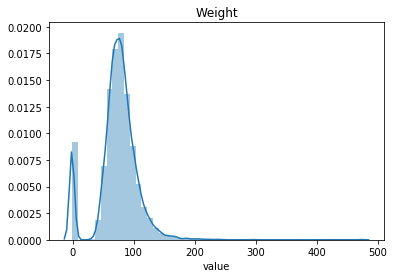

In [14]:
for element in df_static['parameter'].unique():
    if element not in  ['RecordID','ICUType','Gender']:
        (sns.distplot( #make a distribution plot
            df_static.loc[ #get the df_static rows/col with the following criteria
                (df_static['parameter']==element) & (df_static['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

**let's first focus on Height**
* the rough adult range of heigh is ~120-200cm

what does our population currently look like?

In [15]:
df_static.loc[(df_static['parameter']=='Height'),'value'].describe()

count    4000.000000
mean       87.316975
std        85.879238
min        -1.000000
25%        -1.000000
50%       149.900000
75%       170.200000
max       462.300000
Name: value, dtype: float64

**some things to ask:**
* are there multiple units for hight that could be mixed in?
    * yes, cm vs inches, cm vs mm, etc...
* what is the rough adult range of height we might expcet to see?
    * ~120-200cm
* how can we explain values above or below?
    * values less than 0 - errors, convert to nan
    * values less than 10- likely order of magnitude error, multiply by 100 
    * values betwen  10 - 25 (cm)- likely order of magnitude error, multiply by 10 
    * values betwen  25 - 100 (cm)- likely unit issue (inch -> cm). multiply by 2.2
    * values greater than 400 - likely order of magnitude error, divide by 10. 

### so we have an idea how to investigate values that need to be replaced, lets write a function to make this easier:

In [19]:
def replace_value(df, parameter, replacement, threshold=None, threshold2=None, operator=None):
    """returns a dataframe where the erroneous values specified by the keyword arguments are replaced or nullified. 

    Keyword arguments:
        df -- dataframe of longtiduinal values (dtype='dataframe', required)
        parameter  -- df parameter to replace erroneous values on (dtype='string', required)
        replacement -- value or modifier to replace specified erroneous values with (dtype='string', required)
        threshold -- value that the operator is applied to to be considered erroneous  (dtype=int, required)
        threshold2 -- only used for between.  (dtype=int, required)
        operator --  '>' or '<', considered by the threshold to determine erroneous values (dtype='string', required)
    """ 
    filtered = df['parameter'] == parameter

    if operator =='<':
        filtered = filtered & (df['value'] < threshold)

    elif operator =='>':
        filtered = filtered & (df['value'] > threshold)

    elif operator =='between':
        filtered = filtered & (df['value'] > threshold) & (df['value'] < threshold2)
        
    else:
        filtered = filtered & (df['value'] == threshold)


    if 'function' in str(type(replacement)): # if value replacement is a function, then apply that function, else just put the value in
        # value replacement is a function of the input:
        df.loc[filtered, 'value'] = df.loc[filtered, 'value'].apply(replacement)
    else:
        df.loc[filtered, 'value'] = replacement
        
    return df


### here are all of the replacements I thought to make. 
These were inspired by the work cited in the insiration heading above

In [20]:
##### Heights (cm)
df_static = replace_value(df_static, parameter='Height', replacement=np.nan, threshold=0, operator='<')
#function annotation: 
##for the df_static dataframe, look at parameter=Height and for any value that is < 0, replace the value with np.nan

# values less than 10 -> multiply by 100
df_static = replace_value(df_static, parameter='Height', replacement=lambda x: x*100, threshold=10, operator='<')

# values less than 25 -> multiply by 10
df_static= replace_value(df_static, parameter='Height', replacement=lambda x: x*10, threshold=25, operator='<')

# values between 25-100 -> *2.2 (inch -> cm)
df_static= replace_value(df_static, parameter='Height', replacement=lambda x: x*2.2, threshold=100, operator='<')

# values greater than 400 -> divide by 10
df_static= replace_value(df_static, parameter='Height', replacement=lambda x: x*0.1, threshold=400, operator='>')

In [21]:
### Age (years)
# replace anonomized ages (above 91.4) with 91.4
df_static = replace_value(df_static, parameter='Age', replacement=91.4, threshold=130, operator='>')

In [22]:
### Weight (kg)
# replace erroneous weight (<35) or (>299)
df_static = replace_value(df_static, parameter='Weight', replacement=np.nan, threshold=35, operator='<')
df_static = replace_value(df_static, parameter='Weight', replacement=np.nan, threshold=299, operator='>')

In [23]:
### Gender
# replace the unspecified genders as male. I do this because n=5. if it were larger, i would make a new 'not_specified' category
df_static = replace_value(df_static, parameter='Gender', replacement=1, threshold=0, operator='<')

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. <del>do certain kinds of data need to be handled differently?
1. <del>QC: are there any duplicate values that need to be addressed?
1. <del>QC: what do the distributions of static variables look like? 
1. do categorical values need to be reformatted? 

In [ ]:
# do catgorical values need to be reformatted?

In [24]:
df_static.loc[df_static['parameter']=='Gender','value'].value_counts()

1.0    2258
0.0    1742
Name: value, dtype: int64

In [25]:
def remap_categorical(df_static, parameter):
    """remapps the 0 and 1 back to interpretable values in the dataframe. 
    useful to use before onehot encoding. also useful to fill in some missing values and nan's
    
    keyword arguments
    df_static- the dataframe with static values. (dtype=dataframe, required)
    parameter- the parameter to remap (must be in the remapping dictionary). (dtype=string, required)
    """   

    remapping_dic={
    'Gender':{0:'female', 1:'male' , 2:'not_specified'},
    'ICUType':{1: 'CCU', 2: 'CSRU',3: 'MICU', 4: 'SICU'}
    }

    df_static.loc[df_static.loc[:,'parameter']==parameter,'value']=(
        df_static.loc[df_static.loc[:,'parameter']==parameter,'value'].replace(remapping_dic[parameter]))
        
    return(df_static)

In [26]:
df_static= remap_categorical(df_static, 'Gender')
df_static= remap_categorical(df_static, 'ICUType')

In [27]:
df_static.loc[df_static.loc[:,'parameter']=='Gender','value'].value_counts()

male      2258
female    1742
Name: value, dtype: int64

In [28]:
df_static.loc[df_static.loc[:,'parameter']=='ICUType','value'].value_counts()

MICU    1436
SICU    1192
CSRU     782
CCU      590
Name: value, dtype: int64

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. <del>do certain kinds of data need to be handled differently?
1. <del>QC: are there any duplicate values that need to be addressed?
1. <del>QC: what do the distributions of static variables look like? 
1. <del> do categorical values need to be reformatted? 
1. QC: what do the distributions of longitudinal variables look like? 
    * look for erroneous or nonsensical values
    * can you tell if error is due to order of magnitude, unit of measurement, or random?


In [29]:
len(df['parameter'].unique()) #there are 37 different longitudinal variables

37

now we repeat the same process on longitudinal variables:
* look at distributions
* ask which values don't make sense
* implement rules to replace them. 

For brevity, I will show distribution for 5 notable variables (out of 37), and list the replacement conditions I implemented:


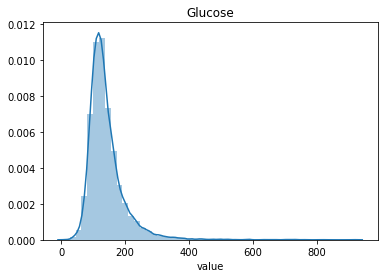

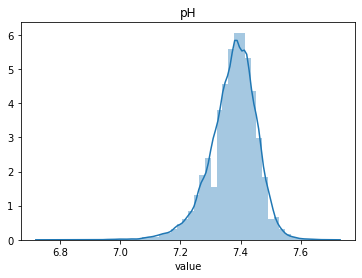

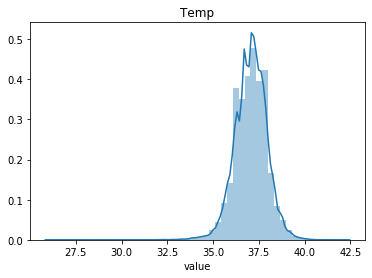

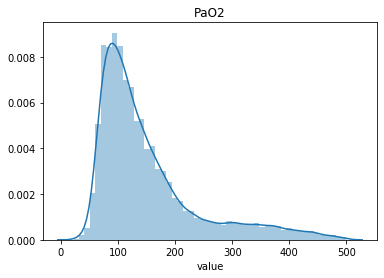

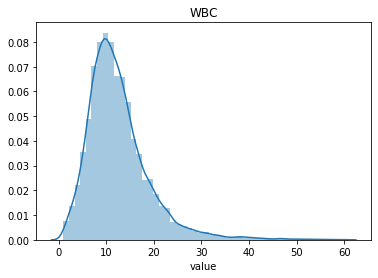

In [32]:
#warning large output
for element in ['Glucose','pH','Temp','PaO2','WBC']: #df['parameter'].unique()[0:5]:
    if element not in  ['RecordID','ICUType']:
        (sns.distplot( #make a distribution plot
            df.loc[ #get the df_static rows/col with the following criteria
                (df['parameter']==element) & (df['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

<br>
all of the value replacement rules I implemented:   (Inspired by alistairewj code provided at beginning)

In [33]:
### now for lots of value cleanup
df = replace_value(df, parameter='DiasABP', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'DiasABP', replacement=np.nan, threshold=200, operator='>')

df = replace_value(df, 'SysABP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'MAP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NIDiasABP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NISysABP',replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NIMAP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'HR', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'HR', replacement=np.nan, threshold=299, operator='>')

df = replace_value(df, 'PaCO2', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'PaCO2', replacement=lambda x: x*10, threshold=10, operator='<')

df = replace_value(df, 'PaO2', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'PaO2', replacement=lambda x: x*10, threshold=20, operator='<')

# the order of these steps matters
df = replace_value(df, 'pH', replacement=lambda x: x*10, threshold=0.65, threshold2=0.8, operator='between')
df = replace_value(df, 'pH', replacement=lambda x: x*0.1, threshold=65, threshold2=80, operator='between')
df = replace_value(df, 'pH', replacement=lambda x: x*0.01, threshold=650, threshold2=800, operator='between')
df = replace_value(df, 'pH', replacement=np.nan, threshold=6.5, operator='<') #setting liberal 6.5-8 pH value threshold for erroneous
df = replace_value(df, 'pH', replacement=np.nan, threshold=8, operator='>')

df = replace_value(df, 'Temp', replacement=lambda x: (x-32)*5/9, threshold=90, threshold2=113, operator='between') #convert farenheit -> celcius; no instances of this in our dataset, but helpful to have. 
df = replace_value(df, 'Temp', replacement=np.nan, threshold=25, operator='<') #setting liberal 25-45c temp thresholds
df = replace_value(df, 'Temp', replacement=np.nan, threshold=45, operator='>')

df = replace_value(df, 'RespRate', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'WBC', replacement=np.nan, threshold=1, operator='<') #setting liberal 1-60 WBC value threshold for erroneous
df = replace_value(df, 'WBC', replacement=np.nan, threshold=60, operator='>')

df = replace_value(df, 'Urine', replacement=lambda x: x/100, threshold=1000, operator='>')

df = replace_value(df, 'ALP', replacement=lambda x: x/10, threshold=500, operator='>')

df = replace_value(df, 'ALT', replacement=lambda x: x/100, threshold=200, operator='>')

df = replace_value(df, 'AST', replacement=lambda x: x/100, threshold=200, operator='>')

df = replace_value(df, 'Glucose', replacement=np.nan, threshold=1000, operator='>') #setting liberal 1000 (mg/dL) value threshold for erroneous

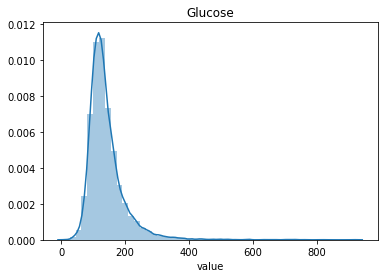

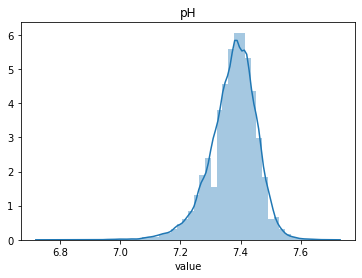

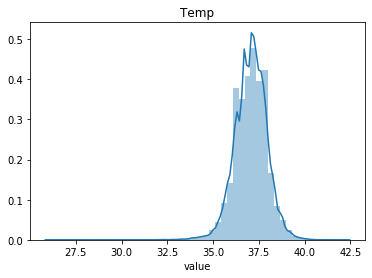

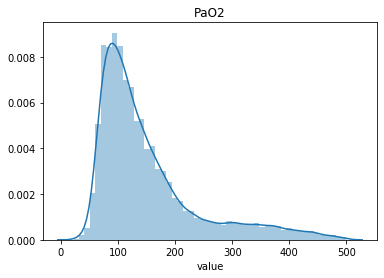

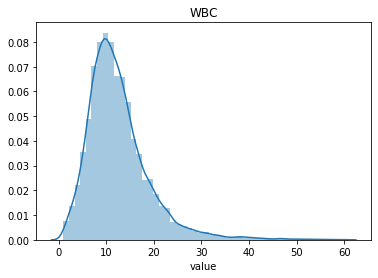

In [34]:
#looking at the variable distribution after error fixing.
for element in ['Glucose','pH','Temp','PaO2','WBC']: #df['parameter'].unique()[0:5]:
    if element not in  ['RecordID','ICUType']:
        (sns.distplot( #make a distribution plot
            df.loc[ #get the df_static rows/col with the following criteria
                (df['parameter']==element) & (df['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

In [35]:
#this allows us to quickly look at each variable distribution
for element in ['Glucose','pH','Temp','PaO2','WBC']:
    print(element)
    print(df.loc[df['parameter']==element,'value'].describe())

Glucose
count    13152.000000
mean       140.553224
std         60.670397
min          8.000000
25%        106.000000
50%        127.000000
75%        159.000000
max        924.000000
Name: value, dtype: float64
pH
count    23821.000000
mean         7.374677
std          0.077942
min          6.750000
25%          7.330000
50%          7.380000
75%          7.430000
max          7.700000
Name: value, dtype: float64
Temp
count    84473.00000
mean        37.06687
std          0.86914
min         26.10000
25%         36.50000
50%         37.10000
75%         37.60000
max         42.20000
Name: value, dtype: float64
PaO2
count    22772.000000
mean       150.575444
std         88.875870
min         22.000000
25%         90.000000
50%        121.500000
75%        177.000000
max        500.000000
Name: value, dtype: float64
WBC
count    12943.000000
mean        12.567686
std          6.605986
min          1.000000
25%          8.300000
50%         11.400000
75%         15.300000
max         6

# datacleaning complete, now on to preprocessing

-------
# Preprocessing
-------

## Create a design matrix X for modeling.
1. aggregate all longitudinal variables using the desired aggregation functions. 
1. reformat df_static from long to wide, call this X
1. merge all aggregated longitudinal data onto X.
1. attach outcomes to X
1. train/test split
    * (optional) sample to reduce effect of class imbalance
1. standardize and scale values (encouraged)
1. encode categorical variables 
1. impute missing/null values
1. finalize matrix for modeling

1. **aggregate all longitudinal variables using the desired aggregation functions :**

In [36]:
def aggregate_and_pivot(df,aggregation='mean'):
    """returns a dataframe where the columns are each type of vital measurement, with 1 row for each hadm_id and the values are aggregated according to the specified aggregate function. 

    Keyword arguments:
    vitals_df -- the cleaned up vitals dataframe (dtype='dataframe', required)
    aggregation -- string specifying the desired aggregation function ('mean', 'max', 'std'). (dtype='str', default='mean')
    """
    
    pivot_df=pd.DataFrame()
    
    ###aggregating all values for each hadm_id and vitalid
    if aggregation=='mean':
        group_agg=df.groupby(['recordid','parameter'])['value'].mean()
        
    elif aggregation=='max':
        group_agg=df.groupby(['recordid','parameter'])['value'].max()
        
    elif aggregation=='std':
        group_agg=df.groupby(['recordid','parameter'])['value'].std()
    
    else:
        pass
    
    ### making a pivot table off aggregated groupby
    pivot_df=pd.pivot_table(pd.DataFrame(group_agg),
                            values='value',
                            index=['recordid'],
                            columns=['parameter']).reset_index()

    adjusted_cols=[x+'_{}'.format(aggregation) for x in list(pivot_df)]

    #renaming columns to have _max after them
    pivot_df.columns= adjusted_cols
    #renaming the hadm id back to how it was origionally
    pivot_df.rename(index=str, columns={'recordid_{}'.format(aggregation):'recordid'}, inplace=True)
    pivot_df.set_index('recordid', inplace=True)
    return(pivot_df)

### note: for a better model, it makes more clinical sense to use the aggregation(s) that make most sense for each column, rather than just mean/std. 

In [37]:
mean_df= aggregate_and_pivot(df,'mean')
mean_df.head()

,ALP_mean,ALT_mean,AST_mean,Albumin_mean,BUN_mean,Bilirubin_mean,Cholesterol_mean,Creatinine_mean,DiasABP_mean,FiO2_mean,...,RespRate_mean,SaO2_mean,SysABP_mean,Temp_mean,TroponinI_mean,TroponinT_mean,Urine_mean,WBC_mean,Weight_mean,pH_mean
recordid,,,,,,,,,,,,,,,,,,,,,
142675,23.0,99.500,33.3225,2.133333,15.571429,2.04,NaN,1.242857,57.838235,0.846154,...,NaN,96.727273,118.117647,36.622917,NaN,NaN,239.775962,6.760000,NaN,7.379500
142676,NaN,NaN,NaN,NaN,25.600000,NaN,NaN,0.460000,NaN,NaN,...,17.666667,NaN,NaN,36.550000,NaN,NaN,90.482143,18.750000,NaN,NaN
142680,77.0,48.500,27.5000,NaN,22.333333,0.70,NaN,0.733333,58.857143,0.605000,...,NaN,93.000000,109.642857,37.918182,NaN,NaN,173.793103,14.966667,79.263043,7.401429
142683,44.0,87.965,102.6650,2.300000,14.666667,1.25,NaN,1.233333,57.965517,0.796154,...,NaN,92.666667,122.017241,37.253488,NaN,NaN,116.200000,20.487500,NaN,7.325000
142688,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,0.800000,58.956522,0.685714,...,19.162162,NaN,114.956522,37.733333,NaN,NaN,94.333333,14.250000,NaN,7.370000


In [38]:
std_df= aggregate_and_pivot(df,'std')
std_df.head()

,ALP_std,ALT_std,AST_std,Albumin_std,BUN_std,Bilirubin_std,Cholesterol_std,Creatinine_std,DiasABP_std,FiO2_std,...,RespRate_std,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std
recordid,,,,,,,,,,,,,,,,,,,,,
142675,3.391165,41.805103,48.484552,0.513160,5.126960,0.753658,NaN,0.525538,12.895227,0.240192,...,NaN,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404
142676,NaN,NaN,NaN,NaN,9.607289,NaN,NaN,0.151658,NaN,NaN,...,4.012392,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN
142680,0.000000,6.363961,2.121320,NaN,1.154701,0.000000,NaN,0.057735,11.141448,0.153811,...,NaN,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812
142683,7.071068,101.872874,117.853487,0.989949,4.041452,0.777817,NaN,0.288675,10.700001,0.171345,...,NaN,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249
142688,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.141421,5.439571,0.167616,...,3.515944,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN


2. **reformat df_static from long to wide, call this X**:

In [39]:
# reformat df_static from long to wide, call this X
X = df_static.pivot(index='recordid', columns='parameter', values='value').copy() # pivot on parameter so there is one column per parameter
X.drop('RecordID', axis=1, inplace=True)

In [40]:
X.head()

parameter,Age,Gender,Height,ICUType,Weight
recordid,,,,,
142675,70,male,175.3,CSRU,85
142676,57,female,NaN,MICU,NaN
142680,60,male,182.9,MICU,78.8
142683,64,male,180.3,CSRU,145.2
142688,51,male,172.7,SICU,90


3. **merging the static data with mean and std aggregations**:

In [41]:
X= pd.merge(X, mean_df, left_index=True, right_index=True)
X= pd.merge(X, std_df, left_index=True, right_index=True)

In [42]:
X.head()

,Age,Gender,Height,ICUType,Weight,ALP_mean,ALT_mean,AST_mean,Albumin_mean,BUN_mean,...,RespRate_std,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std
recordid,,,,,,,,,,,,,,,,,,,,,
142675,70,male,175.3,CSRU,85,23.0,99.500,33.3225,2.133333,15.571429,...,NaN,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404
142676,57,female,NaN,MICU,NaN,NaN,NaN,NaN,NaN,25.600000,...,4.012392,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN
142680,60,male,182.9,MICU,78.8,77.0,48.500,27.5000,NaN,22.333333,...,NaN,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812
142683,64,male,180.3,CSRU,145.2,44.0,87.965,102.6650,2.300000,14.666667,...,NaN,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249
142688,51,male,172.7,SICU,90,NaN,NaN,NaN,NaN,19.000000,...,3.515944,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN


4. **attach outcomes to X**

In [43]:
# format the outcomes first   
y.set_index('RecordID', inplace=True)
y.index.name = 'recordid'

In [44]:
# attach outcomes to X
X = pd.merge(X,y['In-hospital_death'], how='inner', left_index=True, right_index=True)
X.reset_index(inplace=True)
X.head()

,recordid,Age,Gender,Height,ICUType,Weight,ALP_mean,ALT_mean,AST_mean,Albumin_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
0,142675,70,male,175.3,CSRU,85,23.0,99.500,33.3225,2.133333,...,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404,1
1,142676,57,female,NaN,MICU,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN,0
2,142680,60,male,182.9,MICU,78.8,77.0,48.500,27.5000,NaN,...,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812,1
3,142683,64,male,180.3,CSRU,145.2,44.0,87.965,102.6650,2.300000,...,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249,0
4,142688,51,male,172.7,SICU,90,NaN,NaN,NaN,NaN,...,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN,0


In [45]:
X['In-hospital_death'].value_counts()

0    3425
1     567
Name: In-hospital_death, dtype: int64

In [46]:
len(X)

3992

5. **train/test split**
    * (optional) sample to reduce effect of class imballance

In [47]:
# 70/30 train/test set split with 12345=seed and ensuring even distibution of classes. 

from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size=0.3, random_state=12345, 
                               stratify=X['In-hospital_death'])

In [48]:
train['In-hospital_death'].value_counts()

0    2397
1     397
Name: In-hospital_death, dtype: int64

In [49]:
test['In-hospital_death'].value_counts()

0    1028
1     170
Name: In-hospital_death, dtype: int64

### (optional): downsample training samples to adjust for class imballance
* since the readmission/non-readmission labels are imballanced, adjusting for this in the training set can help improve performance. 

In [50]:
# split the training data into positive and negative
rows_pos = train['In-hospital_death'] == 1
df_train_pos = train.loc[rows_pos,:]
df_train_neg = train.loc[~rows_pos,:]
# merge the balanced data
train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)
# shuffle the order of training samples 
train = train.sample(n = len(train), random_state = 42).reset_index(drop = True)

In [51]:
train['In-hospital_death'].value_counts()

1    397
0    397
Name: In-hospital_death, dtype: int64

In [53]:
train.head()

,recordid,Age,Gender,Height,ICUType,Weight,ALP_mean,ALT_mean,AST_mean,Albumin_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
0,152134,64,female,152.4,CSRU,58.4,86.00,50.00,92.0,NaN,...,0.744024,11.353694,0.358498,NaN,NaN,117.866189,2.687006,0.000000,0.058430,0
1,147863,49,female,154.9,CSRU,51,NaN,NaN,NaN,NaN,...,1.516575,22.395709,0.342089,NaN,NaN,145.267306,2.121320,4.026726,0.043627,0
2,152640,47,female,149.9,MICU,79.4,104.00,30.00,29.0,2.70,...,13.426342,14.855307,0.977241,NaN,NaN,129.950434,6.546577,0.000000,0.064638,1
3,152487,55,male,NaN,MICU,137,73.75,62.25,41.5,3.45,...,NaN,13.038001,0.397520,NaN,NaN,31.915248,8.163486,0.000000,NaN,0
4,146329,82,male,NaN,MICU,75.1,56.00,10.50,18.5,NaN,...,NaN,NaN,0.823352,NaN,NaN,124.801060,NaN,0.000000,0.010000,1


In [54]:
test.head()

,recordid,Age,Gender,Height,ICUType,Weight,ALP_mean,ALT_mean,AST_mean,Albumin_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
1708,146981,70,male,175.3,MICU,73.2,50.0,32.0,91.0,3.4,...,NaN,18.213177,0.658017,NaN,NaN,111.215722,2.751363,0.0,0.029364,0
588,144127,84,female,157.5,CCU,60.2,105.0,25.5,132.0,4.2,...,NaN,NaN,0.572276,NaN,NaN,90.152849,4.808326,NaN,NaN,0
2580,149214,36,male,NaN,MICU,NaN,NaN,NaN,NaN,4.1,...,NaN,NaN,0.521071,NaN,NaN,278.388218,1.767767,NaN,0.021213,0
1982,147717,85,male,177.8,CCU,89.9,NaN,NaN,NaN,NaN,...,NaN,NaN,0.346410,NaN,NaN,80.481505,0.777817,NaN,NaN,0
2267,148450,63,male,182.9,SICU,84.9,79.0,12.0,130.0,3.5,...,NaN,16.285909,0.569187,NaN,5.398298,4.335897,1.285690,0.0,0.020817,0


In [55]:
test['In-hospital_death'].value_counts()

0    1028
1     170
Name: In-hospital_death, dtype: int64

6. **normalize and scale values (encouraged)**
    * some modeling algorithms (not all) benefit from log scaling values and/ or converting them to unit variances (ie z_scores) with mean=0 and sd=1. 
    * this is partily because these monotonic transformations help adjust for skewed distributions

In [56]:
def transform(df):
    """returns a dataframe where the values are scaled to unit variances, with mean=0 and std=1. 
    
    Keyword arguments:
    df -- the train or test dataframe (unscaled and not imputed) (dtype='dataframe', required)
    """

    from sklearn.preprocessing import PowerTransformer, StandardScaler
    scaler = StandardScaler()

    do_not_scale=['Gender', 'In-hospital_death', 'ICUType'] # we make a list of columns we don't want to scale (ie outcomes or categorical variables)
    df.set_index('recordid', inplace=True) # here we make sure the index is set to be the recordid. this is important so we can easily attach back on the unscaled columns

    scale= [x for x in list(df) if x not in do_not_scale]

    df[scale] = df[scale].apply(pd.to_numeric, errors='coerce') #making sure the values are in a numeric format (needed to prevent errors)

    df_s= scaler.fit_transform(np.log(df[scale]+1)) # here we logscale the x matrix +1 (to avoid the log(0) error). outputs a numpy matrix
    df_s= pd.DataFrame(df_s, columns= scale) #convert it back to dataframe. 
    df_s.set_index(df.index, inplace=True) # here we make sure the index is set to be the recordid. this is important so we can easily attach back on the unscaled columns

    df_s[[y for y in list(do_not_scale)]]=df[[y for y in list(do_not_scale)]].copy() #attaching back on the unscaled columns
    return(df_s)



In [57]:
train_s= transform(train.copy())
test_s= transform(test.copy())

In [58]:
#lets check to make sure the values were transformed
train_s.describe() #should be mean~0 and std~1

,Age,Height,Weight,ALP_mean,ALT_mean,AST_mean,Albumin_mean,BUN_mean,Bilirubin_mean,Cholesterol_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
count,7.940000e+02,4.010000e+02,7.370000e+02,3.850000e+02,3.940000e+02,3.930000e+02,3.680000e+02,7.860000e+02,3.920000e+02,6.000000e+01,...,2.680000e+02,5.740000e+02,7.850000e+02,3.000000e+01,1.620000e+02,7.750000e+02,7.550000e+02,5.310000e+02,5.740000e+02,794.000000
mean,-1.473213e-15,-1.164156e-14,-8.580503e-16,3.506575e-16,9.017040e-17,-7.028587e-16,1.496388e-16,3.796793e-16,1.019593e-16,2.401782e-15,...,1.922177e-16,7.520117e-16,-1.685842e-16,-1.776357e-16,-4.111937e-18,-4.607067e-16,-3.417428e-16,7.359671e-17,7.852797e-17,0.500000
std,1.000630e+00,1.001249e+00,1.000679e+00,1.001301e+00,1.001271e+00,1.001275e+00,1.001361e+00,1.000637e+00,1.001278e+00,1.008439e+00,...,1.001871e+00,1.000872e+00,1.000638e+00,1.017095e+00,1.003101e+00,1.000646e+00,1.000663e+00,1.000943e+00,1.000872e+00,0.500315
min,-4.264425e+00,-4.361790e+00,-2.769024e+00,-2.094460e+00,-2.491993e+00,-2.734185e+00,-2.750864e+00,-2.564499e+00,-1.050620e+00,-3.933119e+00,...,-1.421805e+00,-4.579689e+00,-2.322531e+00,-1.193975e+00,-4.903149e-01,-5.425252e+00,-2.156892e+00,-4.654913e-01,-1.777980e+00,0.000000
25%,-4.876374e-01,-4.971855e-01,-6.462093e-01,-6.719576e-01,-6.596046e-01,-5.587763e-01,-6.407084e-01,-6.975958e-01,-6.880842e-01,-6.800197e-01,...,-4.998997e-01,-5.929953e-01,-7.120617e-01,-7.637943e-01,-4.630787e-01,-5.057099e-01,-7.660943e-01,-4.654913e-01,-7.200236e-01,0.000000
50%,2.707083e-01,1.647223e-01,-1.248941e-02,-1.432246e-01,6.879312e-03,8.250322e-02,3.313277e-02,-9.858598e-02,-3.831306e-01,9.539577e-02,...,-2.072206e-01,3.077681e-02,-8.326530e-02,-2.313323e-01,-3.460410e-01,1.358764e-01,-4.012335e-02,-4.654913e-01,-1.591633e-01,0.500000
75%,7.384035e-01,7.978751e-01,6.150017e-01,5.697939e-01,6.672240e-01,7.060414e-01,7.820264e-01,6.672726e-01,3.590932e-01,6.022982e-01,...,4.381441e-01,6.445380e-01,5.830179e-01,5.977432e-01,-2.665315e-02,7.097337e-01,6.810231e-01,-2.957705e-01,4.969901e-01,1.000000
max,1.111429e+00,1.987207e+00,3.735017e+00,2.884698e+00,2.330455e+00,1.979497e+00,2.594937e+00,2.729577e+00,4.288103e+00,1.820770e+00,...,4.548218e+00,2.507161e+00,3.867178e+00,2.388017e+00,7.399815e+00,2.180427e+00,3.669135e+00,5.404004e+00,5.000170e+00,1.000000


In [59]:
train_s.head() #lets see how the data looks

,Age,Height,Weight,ALP_mean,ALT_mean,AST_mean,Albumin_mean,BUN_mean,Bilirubin_mean,Cholesterol_mean,...,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,Gender,In-hospital_death,ICUType
recordid,,,,,,,,,,,,,,,,,,,,,
152134,0.033237,-1.435580,-0.975819,-0.024496,0.721008,1.136169,NaN,-0.305062,-0.111147,NaN,...,-1.068272,NaN,NaN,0.660997,0.368098,-0.465491,0.285924,female,0,CSRU
147863,-0.807484,-1.199932,-1.479830,NaN,NaN,NaN,NaN,-0.604259,NaN,NaN,...,-1.145729,NaN,NaN,0.925233,0.045785,2.492816,-0.225992,female,0,CSRU
152640,-0.938294,-1.675101,0.170920,0.352725,0.128099,-0.152517,-0.128432,-0.665824,-0.932687,NaN,...,1.323878,NaN,NaN,0.784328,1.754195,-0.465491,0.498468,female,1,MICU
152487,-0.444334,NaN,2.217411,-0.328914,0.977387,0.244210,0.989761,0.205154,-0.174199,NaN,...,-0.887777,NaN,NaN,-0.974651,2.129867,-0.465491,NaN,male,0,MICU
146329,0.816564,NaN,-0.037297,-0.872718,-1.052912,-0.643187,NaN,-0.999417,-0.585802,NaN,...,0.807453,NaN,NaN,0.733226,NaN,-0.465491,-1.416339,male,1,MICU


7. **Encode categorical variables.**:

In [60]:
def onehotencoder(data, categorical):
    """
    function operations:
    convert categorical columns to proper format
    
    keyword arguments:
    data- dataframe where categorical columns need to be spread to dummy variables (dtype= dataframe, required)
    categorical- list of categorical columns that need onehot encoding (dtype= list of strings, required)
    """

    data = pd.get_dummies(data, columns = categorical, drop_first=True)
    return(data)


In [61]:
train_s= onehotencoder(train_s, ['ICUType','Gender'])
test_s= onehotencoder(test_s, ['ICUType','Gender'])

In [62]:
train_s.head()

,Age,Height,Weight,ALP_mean,ALT_mean,AST_mean,Albumin_mean,BUN_mean,Bilirubin_mean,Cholesterol_mean,...,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death,ICUType_CSRU,ICUType_MICU,ICUType_SICU,Gender_male
recordid,,,,,,,,,,,,,,,,,,,,,
152134,0.033237,-1.435580,-0.975819,-0.024496,0.721008,1.136169,NaN,-0.305062,-0.111147,NaN,...,NaN,0.660997,0.368098,-0.465491,0.285924,0,1,0,0,0
147863,-0.807484,-1.199932,-1.479830,NaN,NaN,NaN,NaN,-0.604259,NaN,NaN,...,NaN,0.925233,0.045785,2.492816,-0.225992,0,1,0,0,0
152640,-0.938294,-1.675101,0.170920,0.352725,0.128099,-0.152517,-0.128432,-0.665824,-0.932687,NaN,...,NaN,0.784328,1.754195,-0.465491,0.498468,1,0,1,0,0
152487,-0.444334,NaN,2.217411,-0.328914,0.977387,0.244210,0.989761,0.205154,-0.174199,NaN,...,NaN,-0.974651,2.129867,-0.465491,NaN,0,0,1,0,1
146329,0.816564,NaN,-0.037297,-0.872718,-1.052912,-0.643187,NaN,-0.999417,-0.585802,NaN,...,NaN,0.733226,NaN,-0.465491,-1.416339,1,0,1,0,1


8. **impute missing/null values**
    * there are lots of ways to impute, 
    * impute in a way that makes sense for your data
        * ie maybe it's the median of the "healthy patients"
        * more complex algorithm such as MICE
    * **here we will mean impute for simplicity**

In [63]:
def imputer_fxn(data, impute_type='mean'):
    """returns a dataframe where null values (np.nan) are filled in by the specified imputation technique (colwise)

    Keyword arguments:
    data -- the cleaned up vitals dataframe (dtype='dataframe', required)
    impute_type -- string specifying the imputation type (ie mean, median, most_frequent. (dtype='str', default='mean')
    
    NOTE: this function assumes that categorical variables are already imputed and doesn't make any destinction between categorical or continuous variables. 
    """
    from sklearn.impute import SimpleImputer
       
    #impute
    imp = SimpleImputer(missing_values=np.nan, strategy='{}'.format(impute_type))
    data_imp= imp.fit_transform(data)
    df= pd.DataFrame(data_imp, columns=list(data))
    df.set_index(data.index, inplace=True)
    
    return(df)

In [67]:
train_imp=imputer_fxn(train_s, impute_type='mean')
test_imp=imputer_fxn(test_s,impute_type='mean')


In [68]:
# checking to make sure imputing worked
pd.DataFrame(train_imp, columns=list(train_s)).isnull().sum().max()

0

In [69]:
pd.DataFrame(test_imp, columns=list(test_s)).isnull().sum().max()

0

9. **finalize matrix for modeling**
    * moving the outcome to a 'y' vector
    * moving the row label to a 'recordid' vector
    * converting the pandas dataframe into a numpy matrix (often perferred in modeling)

In [70]:
#train
train_recordid= train_imp.reset_index().pop('recordid')
train_imp['In-hospital_death'] =pd.to_numeric(train_imp['In-hospital_death'])
y= np.array(train_imp.pop('In-hospital_death'))
x= np.array(train_imp)

#test
test_recordid= test_imp.reset_index().pop('recordid')
test_imp['In-hospital_death'] =pd.to_numeric(test_imp['In-hospital_death'])
y_test= np.array(test_imp.pop('In-hospital_death'))
x_test= np.array(test_imp)

## save all of the files to the data folder


In [71]:
pd.DataFrame(x).to_csv('../data/x.csv', index=False )
pd.DataFrame(y).to_csv('../data/y.csv',index=False )
pd.DataFrame(x_test).to_csv('../data/x_test.csv', index=False )
pd.DataFrame(y_test).to_csv('../data/y_test.csv',index=False )
pd.DataFrame(train_recordid).to_csv('../data/train_recordid.csv', index=False )
pd.DataFrame(test_recordid).to_csv('../data/test_recordid.csv',index=False )